In [51]:
import pandas as pd
import os

# Define the path to the folder containing the Excel files
folder_path = 'transformed_dataset'  # Update the folder path as needed

# List to hold all filtered dataframes
location_0 = []

# Loop through the years from 1978 to 2022
for year in range(1978, 2023):
    file_name = f't_si_{year}.xlsx'  # File name for the current year
    file_path = os.path.join(folder_path, file_name)  # Full file path
    
    try:
        # Check if the file exists
        if os.path.exists(file_path):
            # Read the Excel file
            df = pd.read_excel(file_path)
            
            # Filter rows where Location == 'loc_0'
            location_0.append(df[df['Location'] == 'Loc_0'])
        else:
            print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Concatenate all filtered dataframes into a single dataframe
df_0 = pd.concat(location_0, ignore_index=True)

# Display the final concatenated dataframe
print(df_0)

            Date      Day  Year  Month Location  Rainfall (in mm)  Latitude  \
0     1978-01-01    Day_1  1978      1    Loc_0               1.0     27.25   
1     1978-01-02    Day_2  1978      1    Loc_0               0.0     27.25   
2     1978-01-03    Day_3  1978      1    Loc_0               0.0     27.25   
3     1978-01-04    Day_4  1978      1    Loc_0               0.0     27.25   
4     1978-01-05    Day_5  1978      1    Loc_0               0.0     27.25   
...          ...      ...   ...    ...      ...               ...       ...   
16185 2022-12-27  Day_361  2022     12    Loc_0               0.0     27.25   
16186 2022-12-28  Day_362  2022     12    Loc_0               0.0     27.25   
16187 2022-12-29  Day_363  2022     12    Loc_0               0.3     27.25   
16188 2022-12-30  Day_364  2022     12    Loc_0               0.0     27.25   
16189 2022-12-31  Day_365  2022     12    Loc_0               0.0     27.25   

       Longitude  Quarter  
0          88.25       

In [52]:
# Save the final concatenated dataframe to a new Excel file
output_file = 'location_0.xlsx'
df_0.to_excel(output_file, index=False)

print(f"Data saved to {output_file}")


Data saved to location_0.xlsx


In [8]:
df_0.head(10)

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter
0,1978-01-01,Day_1,1978,1,Loc_0,1.0,27.25,88.25,1
1,1978-01-02,Day_2,1978,1,Loc_0,0.0,27.25,88.25,1
2,1978-01-03,Day_3,1978,1,Loc_0,0.0,27.25,88.25,1
3,1978-01-04,Day_4,1978,1,Loc_0,0.0,27.25,88.25,1
4,1978-01-05,Day_5,1978,1,Loc_0,0.0,27.25,88.25,1
5,1978-01-06,Day_6,1978,1,Loc_0,0.0,27.25,88.25,1
6,1978-01-07,Day_7,1978,1,Loc_0,0.0,27.25,88.25,1
7,1978-01-08,Day_8,1978,1,Loc_0,1.0,27.25,88.25,1
8,1978-01-09,Day_9,1978,1,Loc_0,0.0,27.25,88.25,1
9,1978-01-10,Day_10,1978,1,Loc_0,0.0,27.25,88.25,1


In [9]:
# Convert the 'Date' column to datetime format and set it as the index
df_0['Date'] = pd.to_datetime(df_0['Date'])
df_0.set_index('Date', inplace=True)

In [11]:
# Check for missing values
print(location_0_df.isnull().sum())

# Fill missing values if needed (e.g., using forward fill)
location_0_df.fillna(method='ffill', inplace=True)

Date                0.0
Day                 0.0
Year                0.0
Month               0.0
Location            0.0
Rainfall (in mm)    0.0
Latitude            0.0
Longitude           0.0
Quarter             0.0
dtype: float64


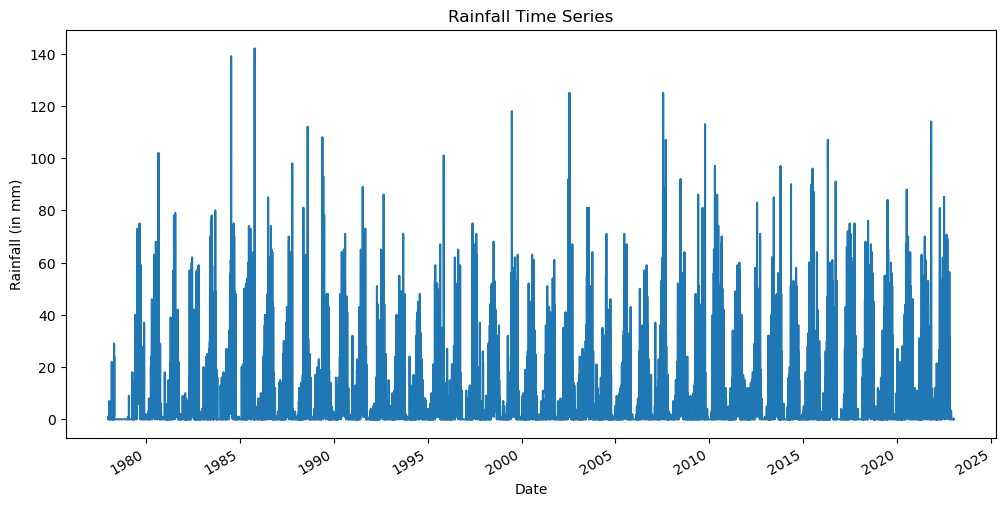

In [13]:
import matplotlib.pyplot as plt

# Plot Rainfall over time
df_0['Rainfall (in mm)'].plot(figsize=(12, 6))
plt.title('Rainfall Time Series')
plt.xlabel('Date')
plt.ylabel('Rainfall (in mm)')
plt.show()

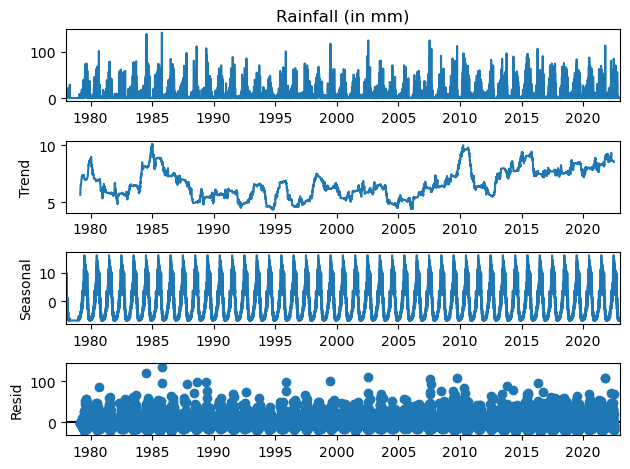

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df_0['Rainfall (in mm)'], model='additive', period=365)
result.plot()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(df_0['Rainfall (in mm)'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

# If the p-value is greater than 0.05, the series is non-stationary

ADF Statistic: -9.437585060707384
p-value: 4.994097705772969e-16


In [37]:
df_0.head(20)

,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter
Date,,,,,,,,
1978-01-01,Day_1,1978,1,Loc_0,1.0,27.25,88.25,1
1978-01-02,Day_2,1978,1,Loc_0,0.0,27.25,88.25,1
1978-01-03,Day_3,1978,1,Loc_0,0.0,27.25,88.25,1
1978-01-04,Day_4,1978,1,Loc_0,0.0,27.25,88.25,1
1978-01-05,Day_5,1978,1,Loc_0,0.0,27.25,88.25,1
1978-01-06,Day_6,1978,1,Loc_0,0.0,27.25,88.25,1
1978-01-07,Day_7,1978,1,Loc_0,0.0,27.25,88.25,1
1978-01-08,Day_8,1978,1,Loc_0,1.0,27.25,88.25,1
1978-01-09,Day_9,1978,1,Loc_0,0.0,27.25,88.25,1


In [39]:
df_0 = df_0.asfreq('D')


In [40]:
print(df_0.index.freq)

<Day>


In [41]:
# Split the data into train and test sets
train_size = int(len(df_0) * 0.8)
train, test = df_0[:train_size], df_0[train_size:]

# Print the shapes of train and test sets
print(f"Train set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

Train set shape: (13148, 8)
Test set shape: (3288, 8)


In [42]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (adjust p, d, q parameters as necessary)
model = ARIMA(train['Rainfall (in mm)'], order=(1, 1, 1))  # Example ARIMA(1, 1, 1)
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:       Rainfall (in mm)   No. Observations:                13148
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -48397.498
Date:                Thu, 23 Jan 2025   AIC                          96800.997
Time:                        22:32:16   BIC                          96823.449
Sample:                    01-01-1978   HQIC                         96808.494
                         - 12-30-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2360      0.005     48.847      0.000       0.227       0.245
ma.L1         -0.9346      0.002   -376.958      0.000      -0.939      -0.930
sigma2       106.1320      0.446    237.898      0.0

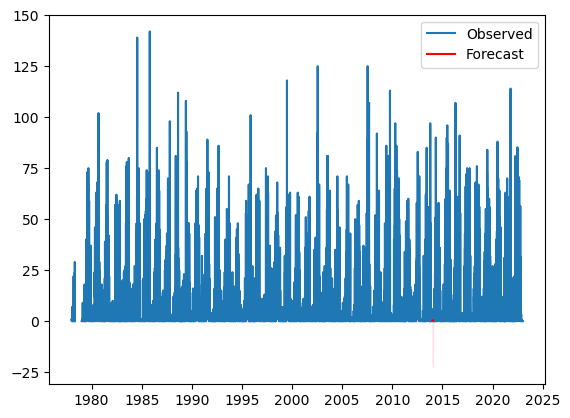

In [46]:
forecast = fitted_model.get_forecast(steps=30)  # Predict the next 30 days
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.plot(df_0['Rainfall (in mm)'], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.legend()
plt.show()


In [48]:
from sklearn.metrics import mean_squared_error

y_test = test['Rainfall (in mm)']
y_pred = fitted_model.get_prediction(start=len(train), end=len(train) + len(test) - 1).predicted_mean
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


RMSE: 16.032585555455057


            Actual  Predicted
Date                         
2020-01-21     0.0   0.298259
2015-11-01     0.0   0.368641
2021-06-15    38.0   0.385250
2020-08-17    45.0   0.389169
2016-09-25    22.0   0.390094
2022-01-08     0.0   0.390312
2015-07-08    22.0   0.390364
2014-08-26    48.0   0.390376
2017-07-06    21.0   0.390379
2018-12-13     0.0   0.390379


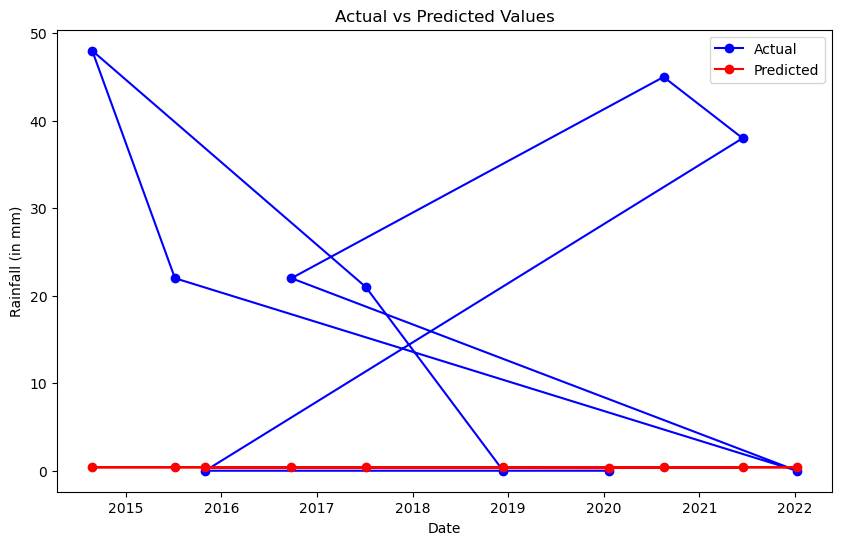

In [50]:
# Select 10 random samples from the test set
test_samples = test.sample(n=10, random_state=42)  # You can specify a seed for reproducibility

# Generate predictions for the selected samples
start = len(train)  # Index where the test set starts
end = start + len(test_samples) - 1  # Index for the last of the 10 samples

predicted_values = fitted_model.predict(start=start, end=end)

# Combine actual and predicted values into a DataFrame for comparison
comparison = pd.DataFrame({
    'Actual': test_samples['Rainfall (in mm)'].values,
    'Predicted': predicted_values.values
}, index=test_samples.index)

# Display the comparison
print(comparison)

# Optional: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison.index, comparison['Actual'], marker='o', label='Actual', color='blue')
plt.plot(comparison.index, comparison['Predicted'], marker='o', label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Rainfall (in mm)')
plt.show()
